## Import Libraries <a id ="9"></a>

* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* KFold: Sklearn K-Folds cross-validator
* StratifiedKFold: Stratified K-Folds cross-validator
* cross_val_score: Sklearn library to evaluate a score by cross-validation
* linear_model: Sklearn library, we are using LogisticRegression algorithm
* tree: Sklearn library, we are using DecisionTreeClassifier
* ensemble: SKlearn library, we are using RandomForestClassifier
* neighbors: SKlearn library, we are using KNNClassifier
* metrics: SKlearn library, we are using classification_report and confusion_matrix
* seaborn: Seaborn Library for confusion matrix visualization

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble, neighbors, metrics
import seaborn as sns

# K Fold: Classification <a id ="19"></a>

## Load Dataset <a id ="20"></a>

We will load the dataset into pandas dataframe and convert it into a toy dataset by removing categorical columns and rows and columns with null values.

In [5]:
train_data = pd.read_csv('train.csv')

train_data.dropna(axis=0, subset=['Survived'], inplace=True)
y = train_data.Survived
train_data.drop(['Survived'], axis=1, inplace=True)
train_data.drop(['Age'], axis=1, inplace=True)

numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))
pd.concat([X, y], axis=1).head()

Shape of input data: (891, 5) and shape of target variable: (891,)


,PassengerId,Pclass,SibSp,Parch,Fare,Survived
0,1,3,1,0,7.2500,0
1,2,1,1,0,71.2833,1
2,3,3,0,0,7.9250,1
3,4,1,1,0,53.1000,1
4,5,3,0,0,8.0500,0


## Model Score Using KFold <a id ="22"></a>

In [6]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 712, Test set:179
Fold:2, Train set: 713, Test set:178
Fold:3, Train set: 713, Test set:178
Fold:4, Train set: 713, Test set:178
Fold:5, Train set: 713, Test set:178


### Using Logistic Regression <a id ="23"></a>

In [7]:
score = cross_val_score(linear_model.LogisticRegression(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.66480447 0.69662921 0.70224719 0.69101124 0.66292135]
Average score: 0.68


### Using Decision Classifier <a id ="24"></a>

In [8]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.67039106 0.61235955 0.5505618  0.64044944 0.69101124]
Average score: 0.63


### Using Random Forest Classifier <a id ="25"></a>

In [9]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.74301676 0.66292135 0.65730337 0.70786517 0.73033708]
Average score: 0.70


### Using KNN Classifier <a id ="25"></a>

In [11]:
score = cross_val_score(neighbors.KNeighborsClassifier(), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.63687151 0.65730337 0.6011236  0.61235955 0.65168539]
Average score: 0.63


## Model Tuning using KFold <a id ="26"></a>

We can also use **cross_val_score()** along with StratifiedKFold to evaluate the model for different hyperparameters. Here we are going to try different hyperparameter values and choose the ones for which we get the highest model score.

### Logistic Classifier Tuning <a id ="27"></a>

We will try different optimization algorithm to finalize the one with the highest accuracy.

In [15]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(linear_model.LogisticRegression(max_iter= 4000, solver= algo, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')

Average score(newton-cg): 0.684
Average score(lbfgs): 0.684
Average score(liblinear): 0.684
Average score(sag): 0.678
Average score(saga): 0.681


### Decision Tree Classifier Tuning <a id ="28"></a>

Here we are going to do tuning based on 'max_depth'. We will try with max depth starting from 1 to 10 and depending on the final 'accuracy' score choose the value of max_depth.

In [16]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.668
Average score(2): 0.706
Average score(3): 0.713
Average score(4): 0.687
Average score(5): 0.688
Average score(6): 0.682
Average score(7): 0.669
Average score(8): 0.669
Average score(9): 0.663
Average score(10): 0.664


### Random Forest Classifier Tuning <a id ="29"></a>

Here we are going to do tuning based on 'n_estimators'. We will try with estimators starting from 50 to 350 and depending on the final 'rmse' score, choose the value of estimator.

In [17]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.703
Average score(100): 0.700
Average score(150): 0.691
Average score(200): 0.697
Average score(250): 0.692
Average score(300): 0.695
Average score(350): 0.700


### KNN Classifier Tuning <a id ="29"></a>

KNN is neighborhood-based classfier. So, we will try with n_neighbors starting from 3 to 10 and depending on the final 'accuracy' score, choose the value of n_neighbors.

In [12]:
n_neighbors = [3, 4, 5, 6, 7, 8, 9, 10]

for val in n_neighbors:
    score = cross_val_score(neighbors.KNeighborsClassifier(n_neighbors= val), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(3): 0.602
Average score(4): 0.646
Average score(5): 0.632
Average score(6): 0.659
Average score(7): 0.622
Average score(8): 0.644
Average score(9): 0.632
Average score(10): 0.637


## Best Model and Result Analysis <a id ="30"></a>

### Logistic Classifier

In [40]:
model = linear_model.LogisticRegression(max_iter= 4000, solver= 'sag', random_state= 42)
model.fit(X,y)
pred_result = model.predict(X)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       549
           1       0.68      0.35      0.46       342

    accuracy                           0.69       891
   macro avg       0.69      0.62      0.62       891
weighted avg       0.69      0.69      0.66       891



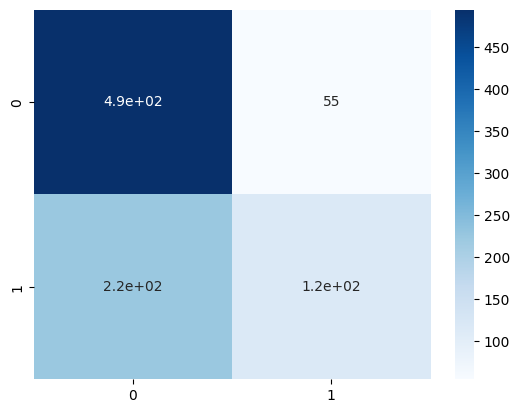

In [41]:
conf_mat = metrics.confusion_matrix(y, pred_result)
sns.heatmap(conf_mat, annot=True, cmap='Blues')
print(metrics.classification_report(y, pred_result))

### Decision Tree Classifier

In [38]:
model = tree.DecisionTreeClassifier(max_depth= 3, random_state= 42)
model.fit(X,y)
pred_result = model.predict(X)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       549
           1       0.68      0.51      0.59       342

    accuracy                           0.72       891
   macro avg       0.71      0.68      0.69       891
weighted avg       0.72      0.72      0.71       891



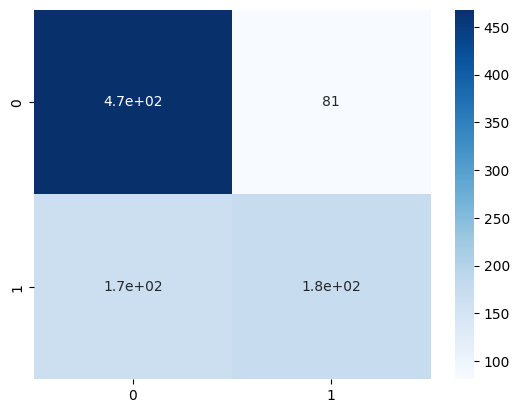

In [39]:
conf_mat = metrics.confusion_matrix(y, pred_result)
sns.heatmap(conf_mat, annot=True, cmap='Blues')
print(metrics.classification_report(y, pred_result))

### Random Forest Classifier

In [36]:
model = ensemble.RandomForestClassifier(n_estimators= 50, random_state= 42)
model.fit(X,y)
pred_result = model.predict(X)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



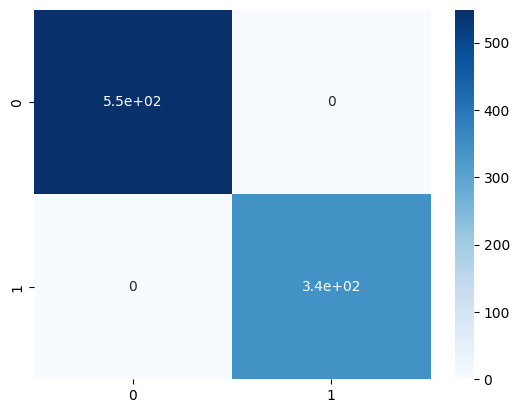

In [37]:
conf_mat = metrics.confusion_matrix(y, pred_result)
sns.heatmap(conf_mat, annot=True, cmap='Blues')
print(metrics.classification_report(y, pred_result))

### KNN Classifier

In [42]:
model = neighbors.KNeighborsClassifier(n_neighbors= 6)
model.fit(X,y)
pred_result = model.predict(X)

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       549
           1       0.78      0.40      0.53       342

    accuracy                           0.73       891
   macro avg       0.75      0.67      0.67       891
weighted avg       0.74      0.73      0.70       891



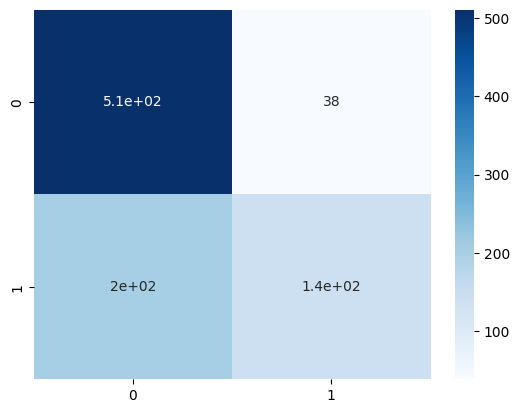

In [43]:
conf_mat = metrics.confusion_matrix(y, pred_result)
sns.heatmap(conf_mat, annot=True, cmap='Blues')
print(metrics.classification_report(y, pred_result))